# Extra Assignment: Radiative Equilibrium

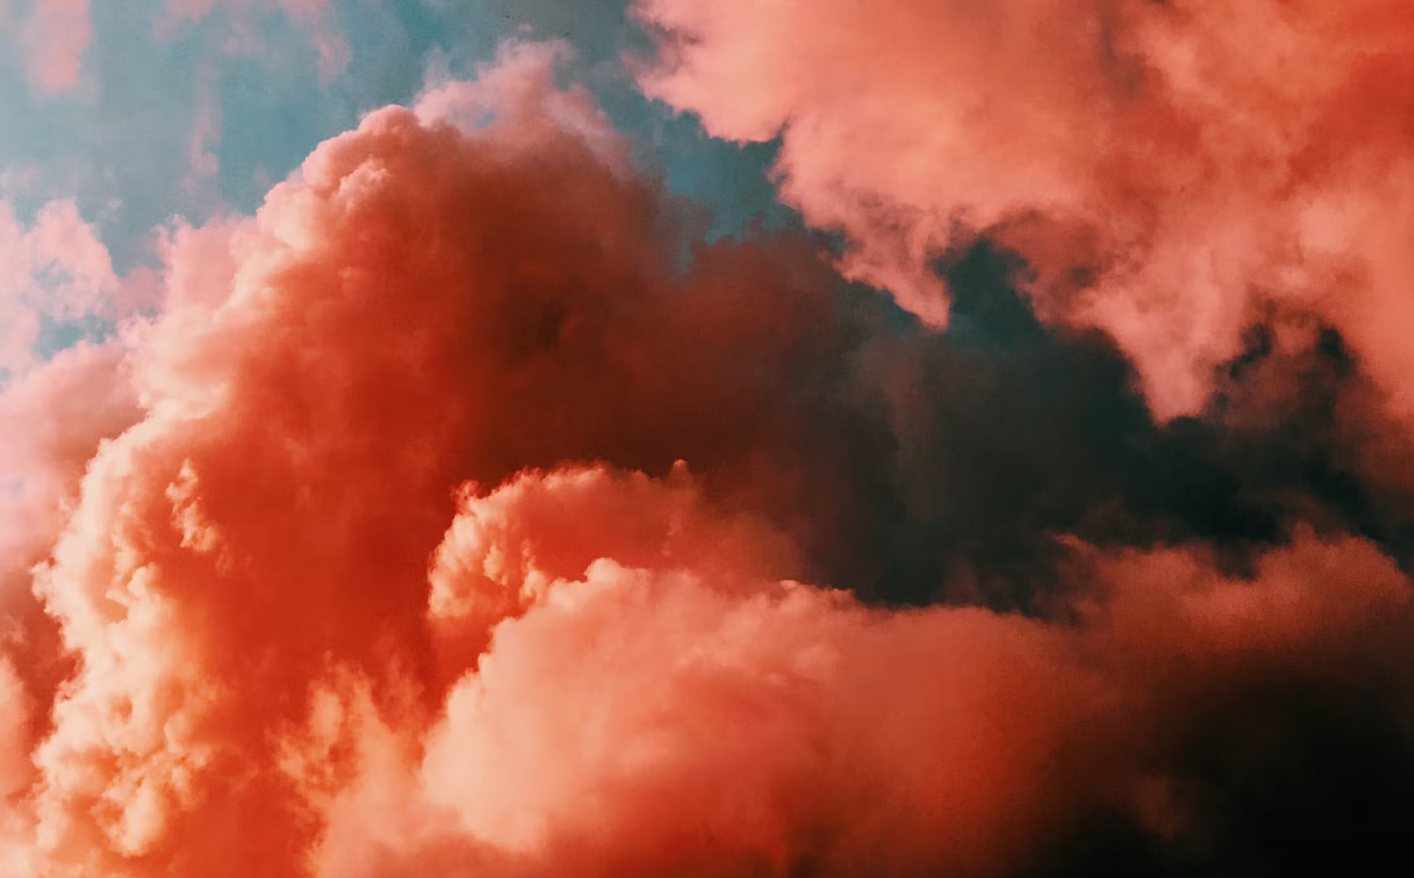

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Defining base parameters

---
$S_0$ = Average flux entering the earth's atmosphere in [W/m^2] 

$S_{face}$ = W/m^2 (Average flux entering earth's atmosphere taking into account ellipsoid geometry)

$Albedo$ = How much of the initial short wave radiation is sent back out of the atmosphere

$Boltzmann \ constant$ = Stefan-Boltzmann constant. Relationship between temperature and radiation /m^2 for a blackbody

$Absorptivity$ = the fraction of longwave radiation that is being absorbed. Longwave = From terrestrial origin

$Emissivity$ 
"the ratio between the actual emitted radiation and the radiation flux that the atmosphere would emit if it would act as a black body"

---

In [55]:
S_0 = 1361 
S_face = S_0 / 4
Albedo = 0.3 
Boltzmann_constant = 5.67e-8 
Absorptivity = 0.8 
Emissivity = 0.8 

### Part A. Equilibrium surface temperature and equilibrium temperature of the atmosphere

Isolating the constant terms (solar radiation) : left part of the diagram

In [3]:
# Purely looking at initial radiation and albedo (left part)

# In
In_shortwave = S_face # W/m^2
print(In_shortwave,'Shortwave radiation coming in from solar radiation in W/m^2')

# Out
Out_shortwave = S_face * Albedo # W/m^2
print(Out_shortwave,'Shortwave radiation going out from solar radiation reflected by albedo in W/m^2')

# Net
Sum_radiation_shortwave = In_shortwave - Out_shortwave 
print(Sum_radiation_shortwave,'Net shortwave radiation in W/m^2')

340.25 Shortwave radiation coming in from solar radiation in W/m^2
102.075 Shortwave radiation going out from solar radiation reflected by albedo in W/m^2
238.175 Net shortwave radiation in W/m^2


Solar radiation coming in and out are constant in this model. Since the incoming radiation $S_0 /4$ is larger than the flux solar radiation going out $S_0/4 * \alpha$, it will have to be compensated by the other terms.

---

The flux out comes from longwave radiation from two sources:
1. The radiation from the ground (Blackbody radiation)
2. The radiation coming from the atmosphere.

We know that 
$$ S_0/4 = (1-a) \sigma T_g ^4 + \epsilon \sigma T_a ^4$$ 
(from energy balance, flux in = flux out (ground + atmosphere))


$T_g$ is the main variable as T_a can be expressed as a function of $T_g$.

$$T_a^4 = \frac{a}{\epsilon} \frac{T_g^4}{2}$$
$$T_a = \frac {T_g}{2^{1/4}}$$

We can therefore find equilibrium surface temperature by varying T_g and seeing where the total flux going out = total flux going in. 

In [73]:
T_g = np.arange(0, 320, 1)
T_a = (T_g**4 / 2)**0.25 
Out_longwave_ground = (1-Absorptivity) * Boltzmann_constant * T_g**4
Out_longwave_atmosphere = Emissivity * Boltzmann_constant * T_a**4

In_longwave_atmosphere = - np.copy(Out_longwave_ground)

Out_longwave = Out_longwave_ground + Out_longwave_atmosphere


Solution found by varying t_g and finding equilibrium position. This can also be done analytically. The temperature of the ground at equilibrium is found to be 290K.

Ground temperature at equilibrium: 290 K


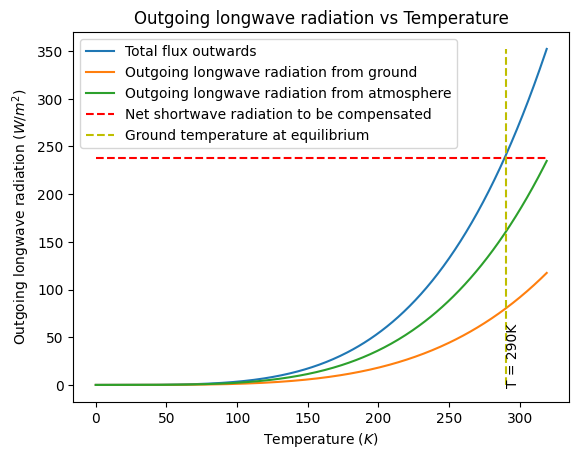

In [72]:

plt.plot(T_g, Out_longwave,label='Total flux outwards')
plt.plot(T_g, Out_longwave_ground, label='Outgoing longwave radiation from ground')
plt.plot(T_g, Out_longwave_atmosphere, label='Outgoing longwave radiation from atmosphere')
plt.hlines(Sum_radiation_shortwave, 0, np.max(T_g), colors='r', linestyles='dashed',label='Net shortwave radiation to be compensated')

plt.xlabel('Temperature $(K)$')
plt.ylabel('Outgoing longwave radiation $(W/m^2)$')
plt.title('Outgoing longwave radiation vs Temperature')

ground_temperature_equilibrium = np.min(np.where(Out_longwave > Sum_radiation_shortwave))
print('Ground temperature at equilibrium:',T_g[ground_temperature_equilibrium],'K')

plt.vlines(T_g[ground_temperature_equilibrium], 0, np.max(Out_longwave), colors='y', linestyles='dashed',label='Ground temperature at equilibrium')
plt.text(T_g[ground_temperature_equilibrium], 0, f'T = 290K', rotation=90)
plt.legend()



In degrees Celcius this is equal to 16.85C which is reasonably close to measurements from litterature https://agupubs.onlinelibrary.wiley.com/doi/10.1029/1999RG900002 (13.4-14C). This is especially remarkable given the simplicity of this model.

In [17]:
ground_temperature_equilibrium_celcius = T_g[ground_temperature_equilibrium] - 273.15
print('Ground temperature at equilibrium:',ground_temperature_equilibrium_celcius,'C')

Ground temperature at equilibrium: 16.850000000000023 C


Notes

Outgoing longwave radiation from ground at equilibrium: 80.20566539999999 W/m^2
Outgoing longwave radiation from atmosphere at equilibrium: 160.4113308 W/m^2


Text(0.5, 1.0, 'Energy balance of Idealized greenhouse model')

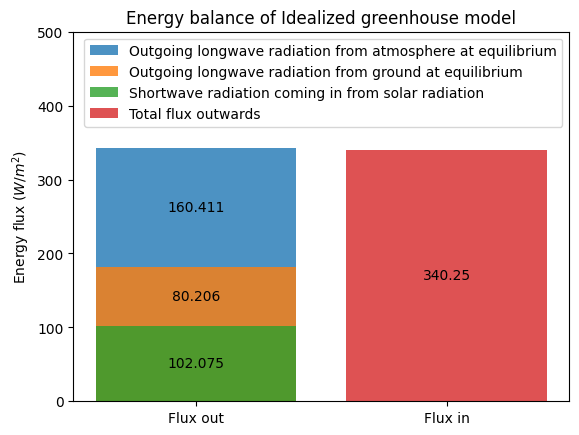

In [61]:
# Creating a visual representation of the energy balance

T_a_equilibrium = (ground_temperature_equilibrium**4 / 2)**0.25 


Out_longwave_ground_equilibrium = (1-Absorptivity) * Boltzmann_constant * ground_temperature_equilibrium**4
Out_longwave_atmosphere_equilibrium = Emissivity * Boltzmann_constant * T_a_equilibrium**4

                                                                         


bar_bottom = Out_shortwave
bar_middle = bar_bottom + Out_longwave_ground_equilibrium
bar_top = bar_middle + Out_longwave_atmosphere_equilibrium

print('Outgoing longwave radiation from ground at equilibrium:',Out_longwave_ground_equilibrium,'W/m^2')
print('Outgoing longwave radiation from atmosphere at equilibrium:',Out_longwave_atmosphere_equilibrium,'W/m^2')

plt.figure()
plt.bar(1,bar_top,label='Outgoing longwave radiation from atmosphere at equilibrium',alpha=0.8)
plt.bar(1, bar_middle,label='Outgoing longwave radiation from ground at equilibrium',alpha=0.8)
plt.bar(1, bar_bottom,label='Shortwave radiation coming in from solar radiation',alpha=0.8)

plt.bar(2 , In_shortwave,label='Total flux outwards',alpha=0.8)
plt.legend()
plt.ylabel('Energy flux $(W/m^2)$')
plt.ylim(0, 500)

plt.text(1, bar_bottom/2, np.round(Out_shortwave,3), ha='center', va='center')
plt.text(1, (bar_bottom+bar_middle)/2, np.round(Out_longwave_ground_equilibrium,3), ha='center', va='center')
plt.text(1, (bar_middle+bar_top)/2, np.round(Out_longwave_atmosphere_equilibrium,3), ha='center', va='center')
plt.text(2, In_shortwave/2, In_shortwave, ha='center', va='center')

plt.xticks([1,2],['Flux out','Flux in'])

plt.title('Energy balance of Idealized greenhouse model')